<a href="https://colab.research.google.com/github/marinavillaschi/portfolio_datascience_mpv/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit card fraud detection

*by [Marina Villaschi](https://www.linkedin.com/in/marinavillaschi/?locale=en_US)*

<center><img width="80%" src="http://images.unsplash.com/photo-1563013544-824ae1b704d3?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1080&fit=max"></center>

<center>Photo by <a href="https://unsplash.com/@rupixen?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">rupixen.com</a> on <a href="https://unsplash.com/s/photos/money-transaction?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a></center>
  
Credit card fraud is not a new issue we face and unfortunately it's been rising during the pandemic of COVID-19.

It is important that credit card companies have the ability to **recognize fraudulent credit card transactions**  to avoid financial loss and also to avoid regular transactions from being blocked due to wrong classification problem wich can cause stress and embaressement for the clients. 

Considering the financial loss can be minimized, investments in AI for fraud detection have been growing in the past few years.

The main goal is to improve **Machine Learning** algorithms based on the large volume of historical data available. The smallest improvement can represent saving a large amount of money.





>  This is a complete Machine Learning project that embraces the following steps:
* **data colecting**
* **data cleaning**
* **data exploring**
* **data preprocessing**
* **machine learning model**
* **model evaluation**

Let's get started!


## Data colecting

The dataset [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud) used in this project was obtained from Kaggle. It contains transactions that occured in two days made by european credit cardholders in September 2013.

The dataset is highly **unbalanced**, presenting 492 fraudulent transactions out of 284,807 representing only 0,17% of all transactions.

It's important to mention that due to confidentiality issues the original features and more background information about the data are not informed. The features named **V1 to V28** are numerical and are the principal component result of a PCA (*Principal Component Analysis*) transformation.



## EDA - Exploratory Data Analysis

The first step towards a good machine learning project is the EDA. Let's start getting to know a bit about our data.

In [1]:
# importing necessary libraries
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing the csv file to a DataFrame
df = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")

### Features and entries

Let's take a look at:
* the dataframe size

In [2]:
print("Entries:  ", df.shape[0], "\nFeatures: ", df.shape[1])

Entries:   284807 
Features:  31


* feature names and types

In [3]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

* a feature description list

    *   `Time`: number of seconds elapsed between this transactions and the first transaction in the dataset.
    *   `V1 a V28`: result of PCA transformation to protect users identities and sensitive features.
    *   `Amount`: transaction amount (in euros)
    *   `Class`: target label that gets:
      * **0** -> for non fraudulent transactions and
      * **1** -> for fraudulent transactions.





* the first few dataframe entries

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Missing values

A very important part of EDA is to check and treat missing values from the dataset.

Next, we will check the proportion of missing values in each column:




In [5]:
# print the proportion of missing values for each column
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

As shown above, the dataset doesn't present any missing values. That indicates good quality of the dataset so there's no missing values treating to do here.

 


### Statistical summary

Next will be printed the statistical summary:

In [6]:
# print the dataframe statistical summary
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


As shown above, the feature `Amount` shows low transaction amounts as it would be expected. 

We can see that there's a huge difference in the range of values of the numerical features `Time` and `Amount`. We will fix that later using feature scaling.


### Feature distribution

Next, a bar chart will be plotted to observe the feature distribution:



0    284315
1       492
Name: Class, dtype: int64


0.173 % of transactions are fraud




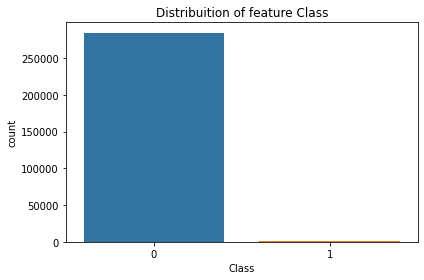

In [8]:
# check the balance for Class feature
print(df.Class.value_counts())
print('\n')
print(round(((df.loc[df.Class == 1].shape[0])/(df.loc[df.Class == 0].shape[0])*100),4),'% of transactions are fraud')
print('\n')

#  plot the countplot
fig, ax = plt.subplots()
sns.countplot(x=df.Class, ax=ax)
ax.set_title('Distribuition of feature Class')
plt.tight_layout()

The bar chart confirms how unbalanced the dataset is, as mentioned before, where the fraudulent transactions represent only 0,17% of total transactions.

The machine learning model is sensitive to unbalanced data so we will need to handle this later on.

Met's plot histograms for `Time` and `Amount` to see the distribuition.



* histograms for `Time`

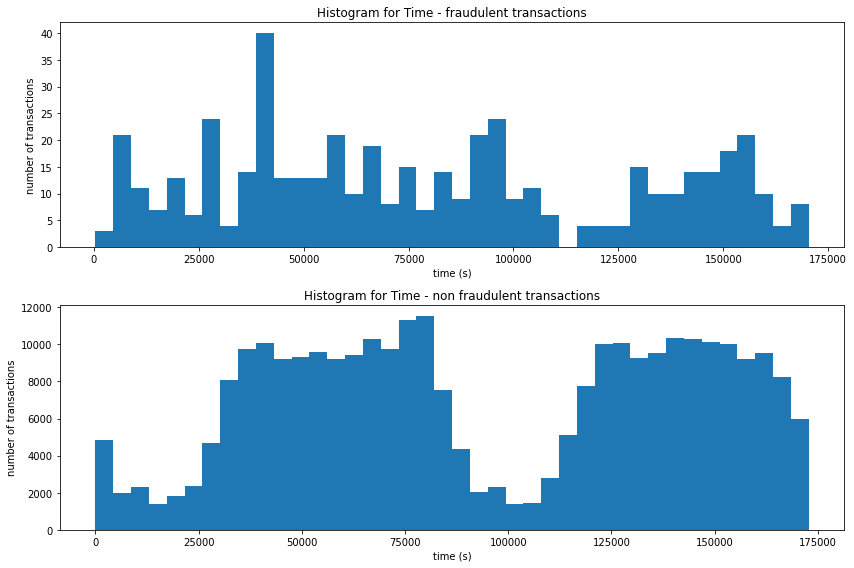

In [11]:
# histograms for Time
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
ax1.hist(df.loc[df.Class==1, 'Time'], bins=40)
ax1.set_title("Histogram for Time - fraudulent transactions")
ax1.set_ylabel("number of transactions")
ax1.set_xlabel("time (s)")

ax2.hist(df.loc[df.Class==0, 'Time'], bins=40)
ax2.set_title("Histogram for Time - non fraudulent transactions")
ax2.set_ylabel("number of transactions")
ax2.set_xlabel("time (s)")

plt.tight_layout()

The histograms above show once again the unbalanced distribution of the dataset. We can see that by the scale of the y-axis that represent number of transactions.

Fraudulent transactions reach a max of 40 as non fraudulent transactions reach a max of 12,000 transactions.




* histograms for `Amount`

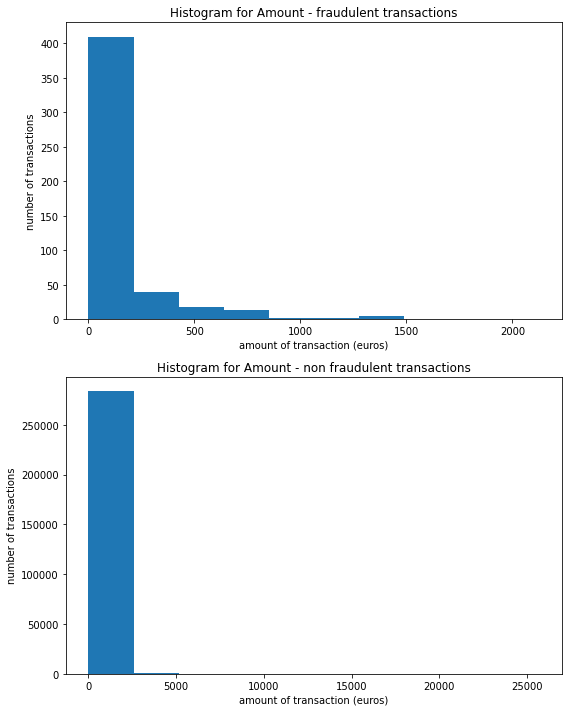

In [12]:
# histograms for Amount

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
ax1.hist(df.loc[df.Class==1, 'Amount'], bins=10)
ax1.set_title("Histogram for Amount - fraudulent transactions")
ax1.set_ylabel("number of transactions")
ax1.set_xlabel("amount of transaction (euros)")

ax2.hist(df.loc[df.Class==0, 'Amount'], bins=10)
ax2.set_title("Histogram for Amount - non fraudulent transactions")
ax2.set_ylabel("number of transactions")
ax2.set_xlabel("amount of transaction (euros)")

plt.tight_layout()

The histograms above show the difference in transaction amounts:

* Most fraudulent transactions reach only 250 euros.

* Most non-fraudulent transactions reach 2,500 euros, 10x higher than fraudulent ones.

Let's plot a `boxplot` of `Amount`:

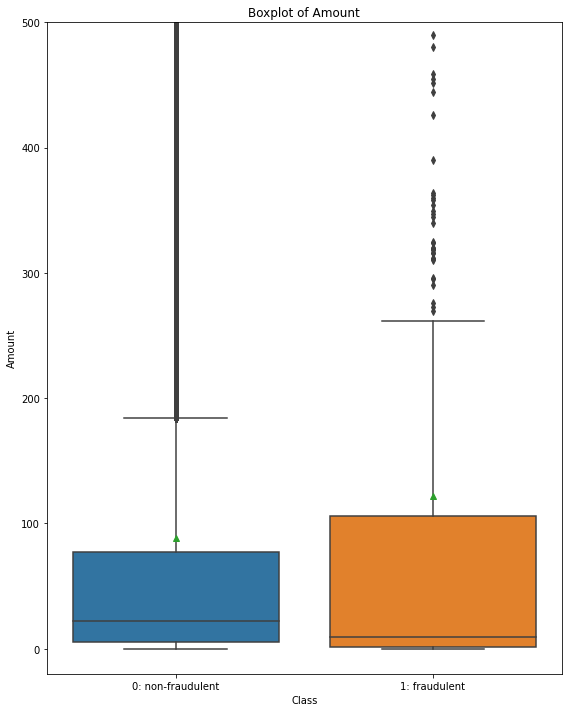

In [13]:
# boxplot of Amount
fig,ax = plt.subplots(figsize=(8,10), sharex=True)
sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
ax.set_title("Boxplot of Amount")
plt.ylim(-20,500)
plt.xticks([0, 1], ['0: non-fraudulent', '1: fraudulent'])
plt.tight_layout()

It's clear that the classes are distributed differently. 



### Feature correlation

We will use the correlation coefficient to evaluate feature correlations and what we can get from it.

Let's visualize the correlation matrix through a heatmap:

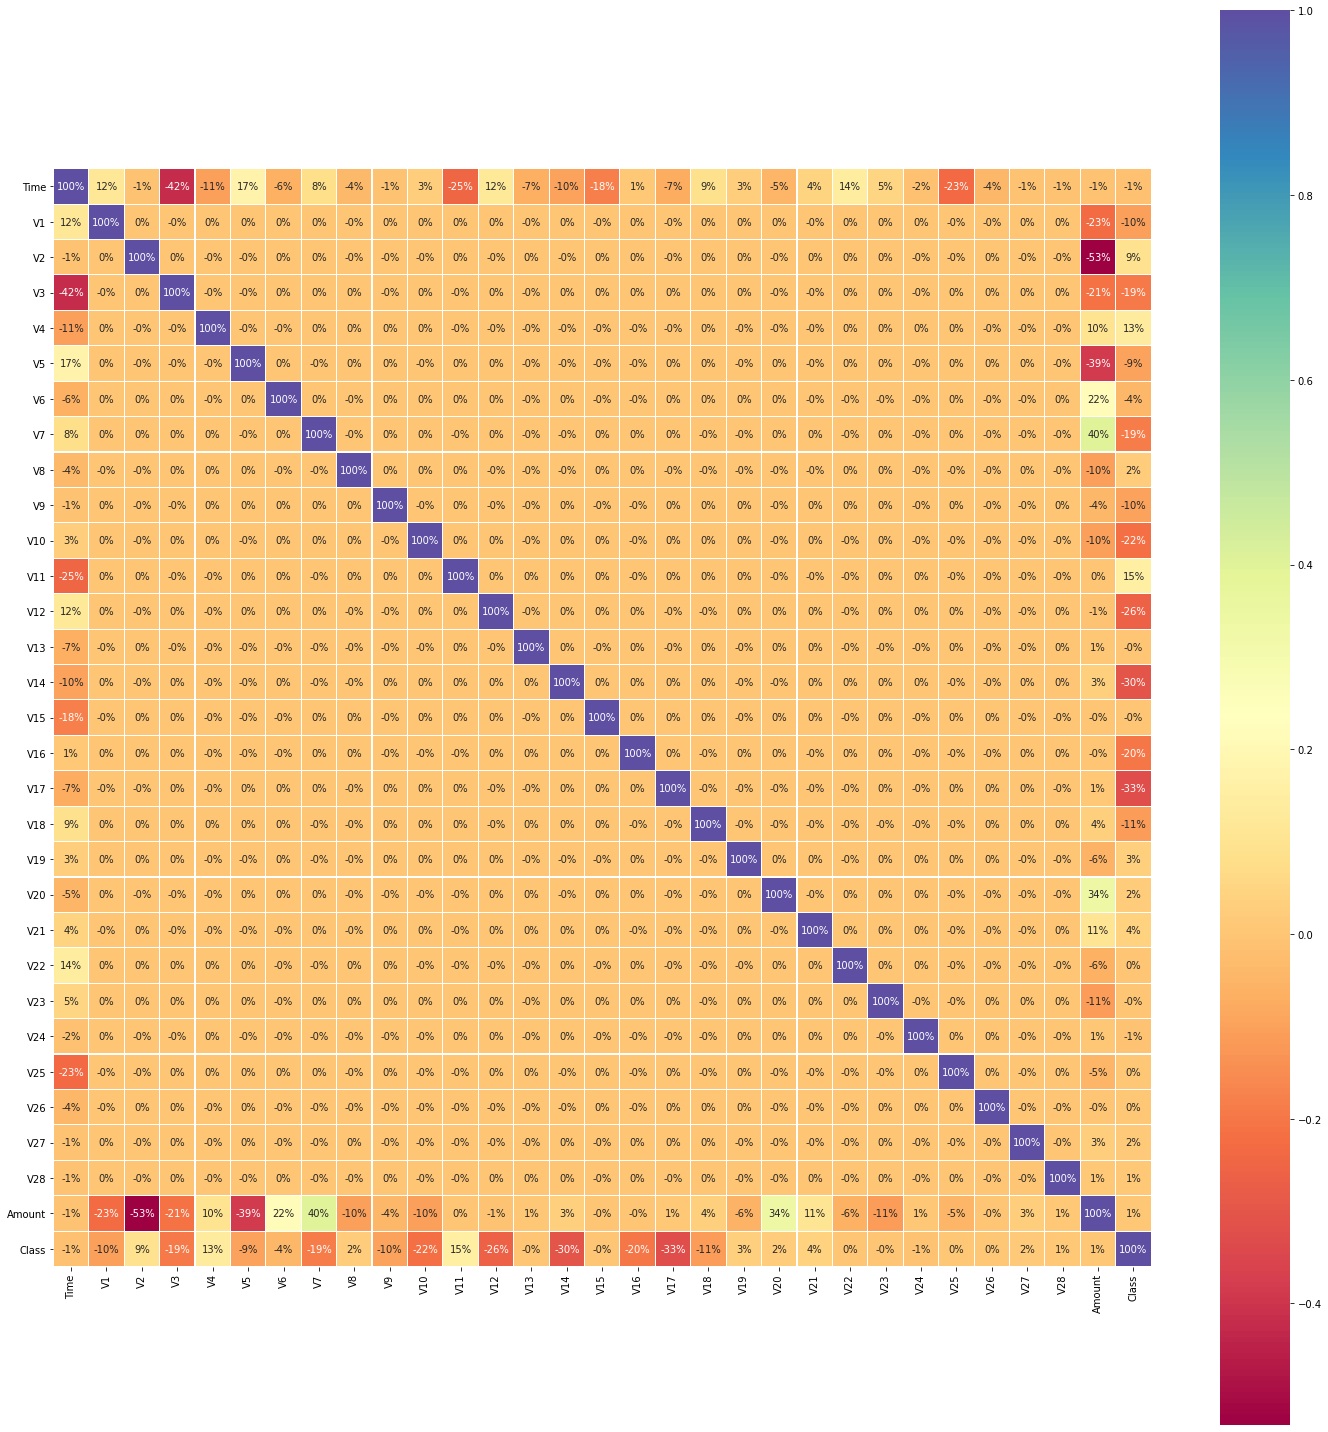

In [14]:
# create a correlation matrix
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='Spectral', fmt=".0%",linewidths=.1, square=True, annot=True)
plt.tight_layout()

From this heatmap we can pick up some correlations but mostly the features are not related at all.

This is once again an indication of how unbalanced the dataset is. This will be handled in the next step.





## Data preparation/preprocessing

The next step is to prepare our dataset to be trained in the machine learning model.

This is a very important step to avoid misinterpretation of the model accuracy and making wrong decisions.




In [15]:
# import sckit-learn packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.under_sampling import RandomUnderSampler

The following preprocessing steps are: 


* **feature scaling (`Time` and `Amount`)**

 As shown before, we need to fix the difference in the range of values for the features `Time` and `Amount`. Let's do that through standardization using the scikit-learn `StandardScaler`.


In [16]:
# standardization of Time e Amount
df_scaled = df.copy()
scaler = StandardScaler()
df_scaled['scaled_Amount'] = scaler.fit_transform(df_scaled.Amount.values.reshape(-1,1))
df_scaled['scaled_Time'] = scaler.fit_transform(df_scaled.Time.values.reshape(-1,1))

df_scaled.drop(['Amount', 'Time'], axis=1, inplace=True)

df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Amount,scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


  The numerical features are now centered on the mean with a unit standard deviation. That's great!

* **splitting the data into feature matrix and target vector**

  We will split the dataset into target vector (y) wich is the `Class` label and feature matrix (X) wich is all the other features.
 

In [17]:
# split data into feature matrix and target vector
X= df_scaled.drop('Class', axis=1)
y= df_scaled.Class

* **splitting the dataset into train and test sets**
  
  We will split the dataset into a training set (X_train, y_train) and a testing set (X_test, y_test) using the scikit-learn `train_test_split`.

  This is important to create a model that generalizes well to new data and does not overfit the training data.
  
  




In [18]:
# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)

* **balancing data**

  We will finally balance our dataset in order to use it on our machine learning model. Again, with unbalanced data we can reach a high accuracy but it's meaningless as it can be ineffective.
  
  Let's use sckit-learn `RandomUnderSampler` to balance our dataset and plot a new bar chart to visualize it.


1    369
0    369
dtype: int64


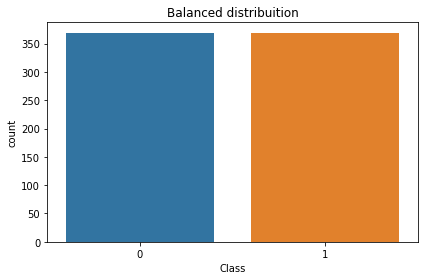

In [19]:
# balancing data with under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# plot the new countplot
print(pd.Series(y_rus).value_counts())

fig, ax = plt.subplots()
sns.countplot(y_rus)
ax.set_title('Balanced distribuition')
ax.set_xlabel('Class')
plt.tight_layout()



Let's plot a correlation matrix after balancing:

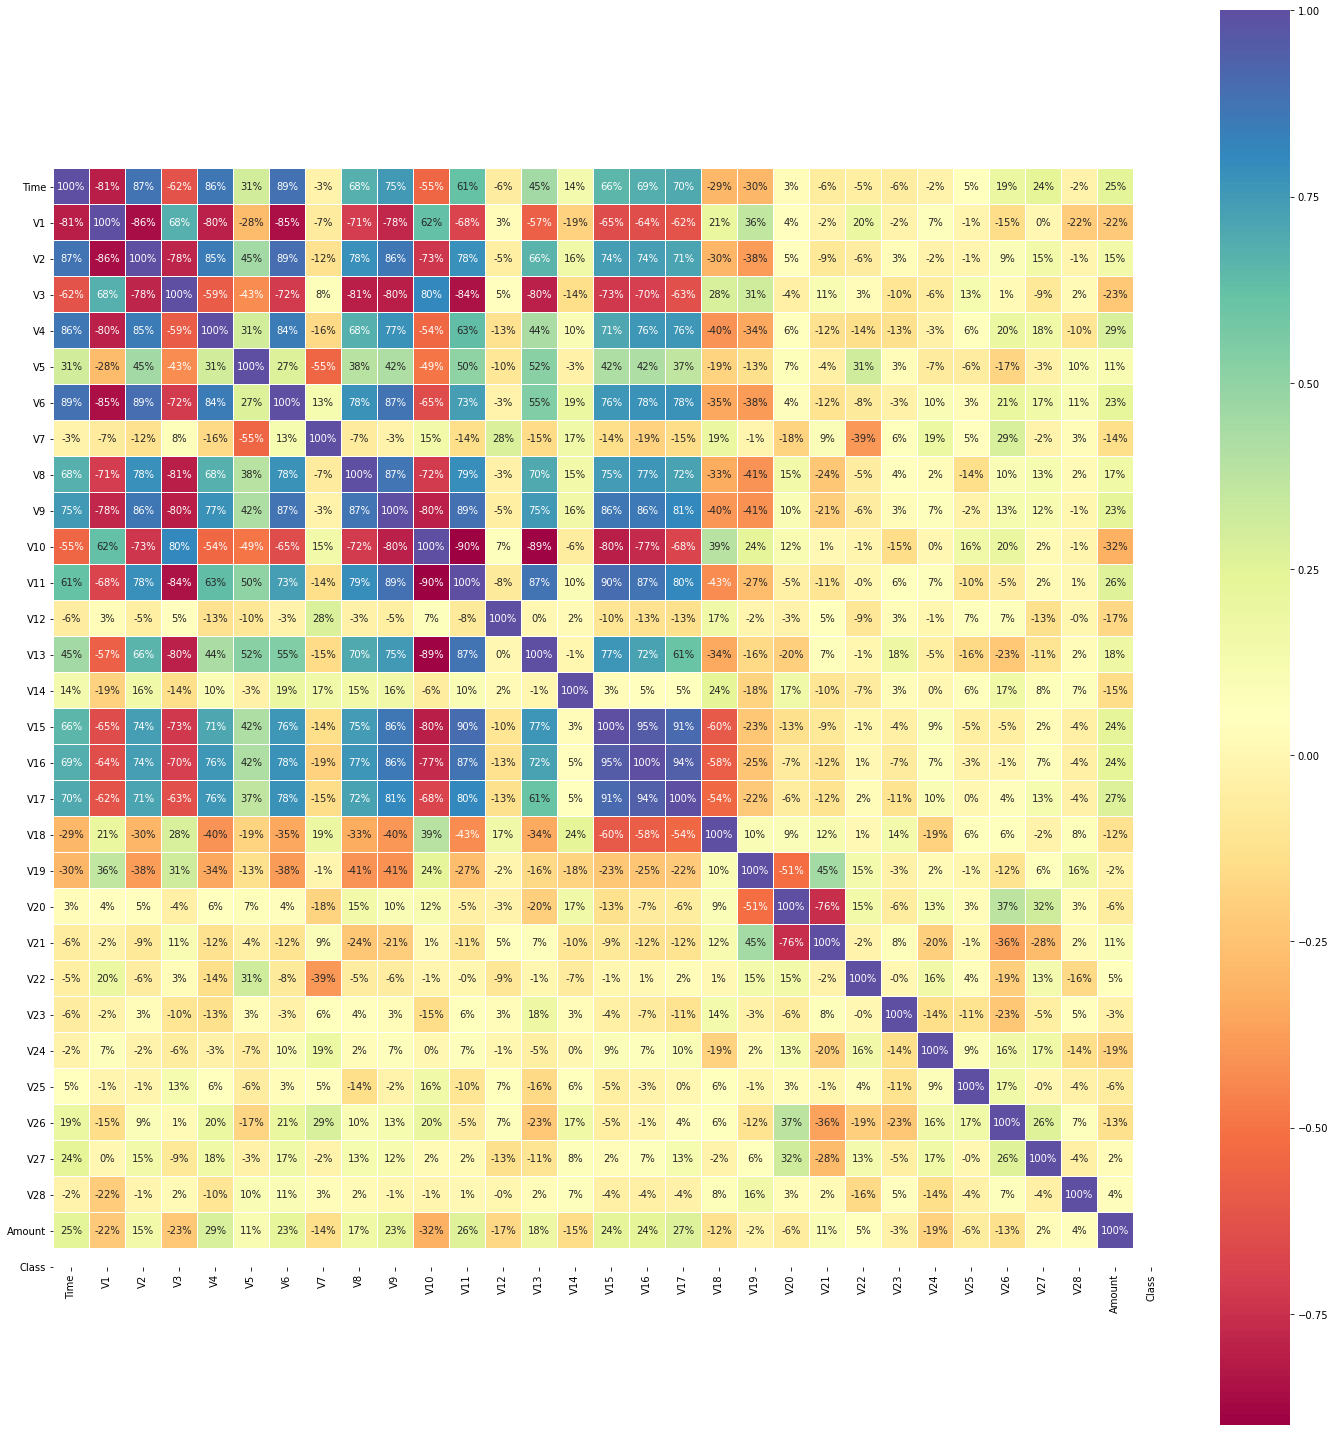

In [20]:
# create a correlation matrix
corr_rus = pd.DataFrame(X_rus).corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Spectral', fmt=".0%",linewidths=.1, square=True, annot=True)
plt.tight_layout()

The new correlation matrix is completely different from the first one we plotted.

The correlations are much clearer now and we can see strong positive and negative correlations.

Now our dataset is finally ready to be used on our machine learning model.



## Machine Learning models

As we are facing a **classification** problem, we will make two machine learning models:

* logistic regression and
* decision tree

Both these models will classify the transactions into fraud or no fraud.

### Logistic Regression

Let's start with the logistic regresson model.

We will take the following steps:
* **pick the model and import it**


In [21]:
# import the logistic regression model
from sklearn.linear_model import LogisticRegression

* **define the model**



In [22]:
# define the model
model= LogisticRegression()

* **train the model**

In [23]:
# train the model
model.fit(X_rus, y_rus)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

* **predict on the test set**

In [25]:
# predict on testing data
y_pred=model.predict(X_test)

* **evaluate the model performance**

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71079
           1       0.04      0.93      0.08       123

    accuracy                           0.97     71202
   macro avg       0.52      0.95      0.53     71202
weighted avg       1.00      0.97      0.98     71202

AUC: 0.9501



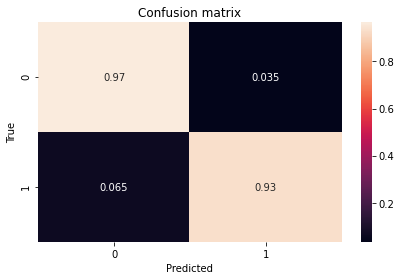

In [27]:
# print the classification report
print("Classification report:")
print(classification_report(y_test, y_pred))

# print AUC (area under the curve)
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plot cofusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)
ax.set_title("Confusion matrix")
ax.set_ylabel("True")
ax.set_xlabel("Predicted")
plt.tight_layout()

The logistic regression model had a good overall performance:

* 97% accuracy
* interesting precision, recall and f1-score values
* 0.95 of AUC wich is a good metric for classification models.

Either way, let's make a second model so we can compare them at the end.

### Decision Tree

Let's make the decision tree model.

We will take the following steps:
* **pick the model and import it**





In [28]:
# import the decision tree model
from sklearn.tree import DecisionTreeClassifier

* **define the model**

In [29]:
# define the model
model_tree = DecisionTreeClassifier(max_depth=3)

* **train the model**

In [30]:
# train the model
model_tree.fit(X_rus, y_rus)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

* **predict on the test set**

In [31]:
# predict on testing data
y_pred_tree=model_tree.predict(X_test)

* **evaluate the model performance**

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     71079
           1       0.03      0.93      0.05       123

    accuracy                           0.94     71202
   macro avg       0.51      0.94      0.51     71202
weighted avg       1.00      0.94      0.97     71202

AUC: 0.9393



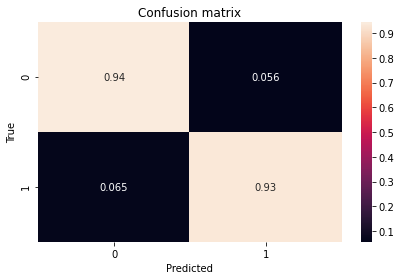

In [32]:
# print the classification report
print("Classification report:")
print(classification_report(y_test, y_pred_tree))

# print AUC (area under the curve)
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_tree)))

# plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_tree,  normalize='true'), annot=True, ax=ax)
ax.set_title("Confusion matrix")
ax.set_ylabel("True")
ax.set_xlabel("Predicted")
plt.tight_layout()

* **plot the decision tree**

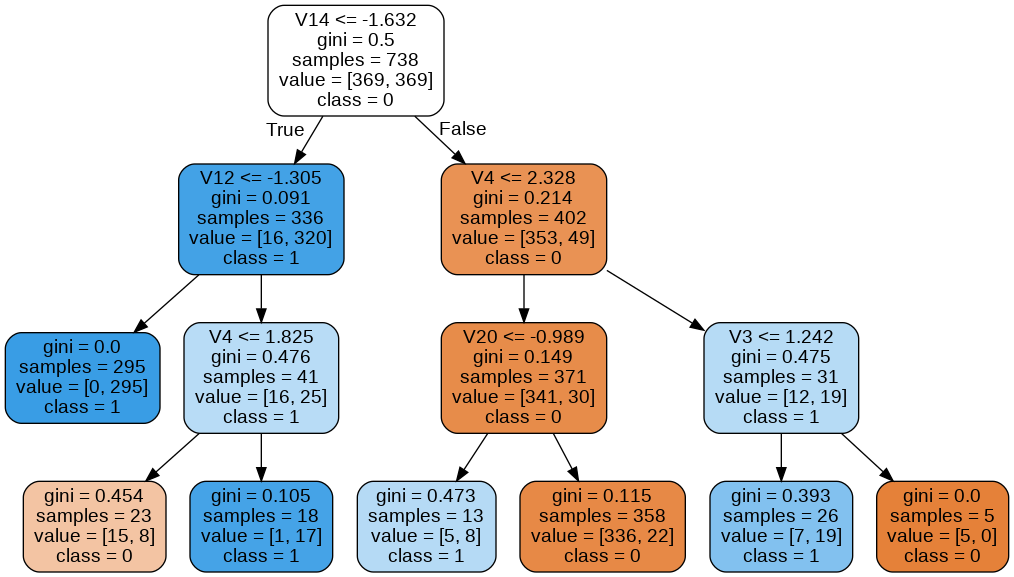

In [33]:
# plot decision tree
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot = export_graphviz(model_tree, filled=True, rounded=True,
                    feature_names=X.columns, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())

The decision tree model also had a good overall performance:

* 94% accuracy (a bit lower than logistic regression)
* interesting precision, recall and f1-score values as well
* 0.94 of AUC wich is a good metric for classification models.



## Final considerations

We have now finished all the process of a machine learning project and we could see that both **classification models** applied showed good and satisfacting overall metrics.

The accuracy by itself is not enough to evaluate the models, so it's important to also consider precision, recall, f1-score and AUC.

Even though both models have shown good performance, there's still room to make a cross-validation or other kind of validation that can help lower the chances of ovefitting the model.

Trying other hyperparameters and even other classification models is also a valid point keeping in mind the goal here that is to **rise fraud detection so it can be avoided**.






## Thank you !
Thank you for your time!

Please let me know if you have any questions, feedback or sugestion about this project. I will appreciate hearing from you!

You can reach me at [LinkedIn](https://www.linkedin.com/in/marinavillaschi/?locale=en_US).

To see this and other Data Science projects, go to my portfolio on [GitHub](https://github.com/marinavillaschi/portfolio_datascience_mpv).
